In [13]:
import os
import pickle
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
def load_pickle_files(folder_path):
    pickle_dict = {}

    for filename in os.listdir(folder_path):
        if filename.endswith('.p'):
            year = filename[-6:-2]
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'rb') as file:
                data = pickle.load(file)
            pickle_dict[year] = data
    
    return pickle_dict

def combine_graphs(graphs):
    combined_graph = nx.DiGraph()
    for graph in graphs.values():
        if isinstance(graph, nx.MultiDiGraph):
            graph = nx.DiGraph(graph)
        combined_graph = nx.compose(combined_graph, graph)
    return combined_graph

def compute_centralities(graph):
    centralities = {}
    centralities['degree'] = dict(graph.degree())
    centralities['closeness'] = nx.closeness_centrality(graph)
    centralities['betweenness'] = nx.betweenness_centrality(graph)
    centralities['eigenvector'] = nx.eigenvector_centrality(graph)
    return centralities

def plot_centralities(centralities):
    # Convert centralities to DataFrame
    df = pd.DataFrame(centralities)
    
    # Plotting
    sns.pairplot(df)
    plt.show()

def main(folder_path):
    graphs_by_year = load_pickle_files(folder_path)
    combined_graph = combine_graphs(graphs_by_year)
    centralities = compute_centralities(combined_graph)
    plot_centralities(centralities)


    year  nodes  edges
0   2010    227    216
1   2011    359    374
2   2012    423    491
3   2013    497    618
4   2014    520    684
5   2015    568    757
6   2016    591    825
7   2017    603    867
8   2018    621    860
9   2019    667    917
10  2020    788    934


IndexError: index 4 is out of bounds for axis 1 with size 4

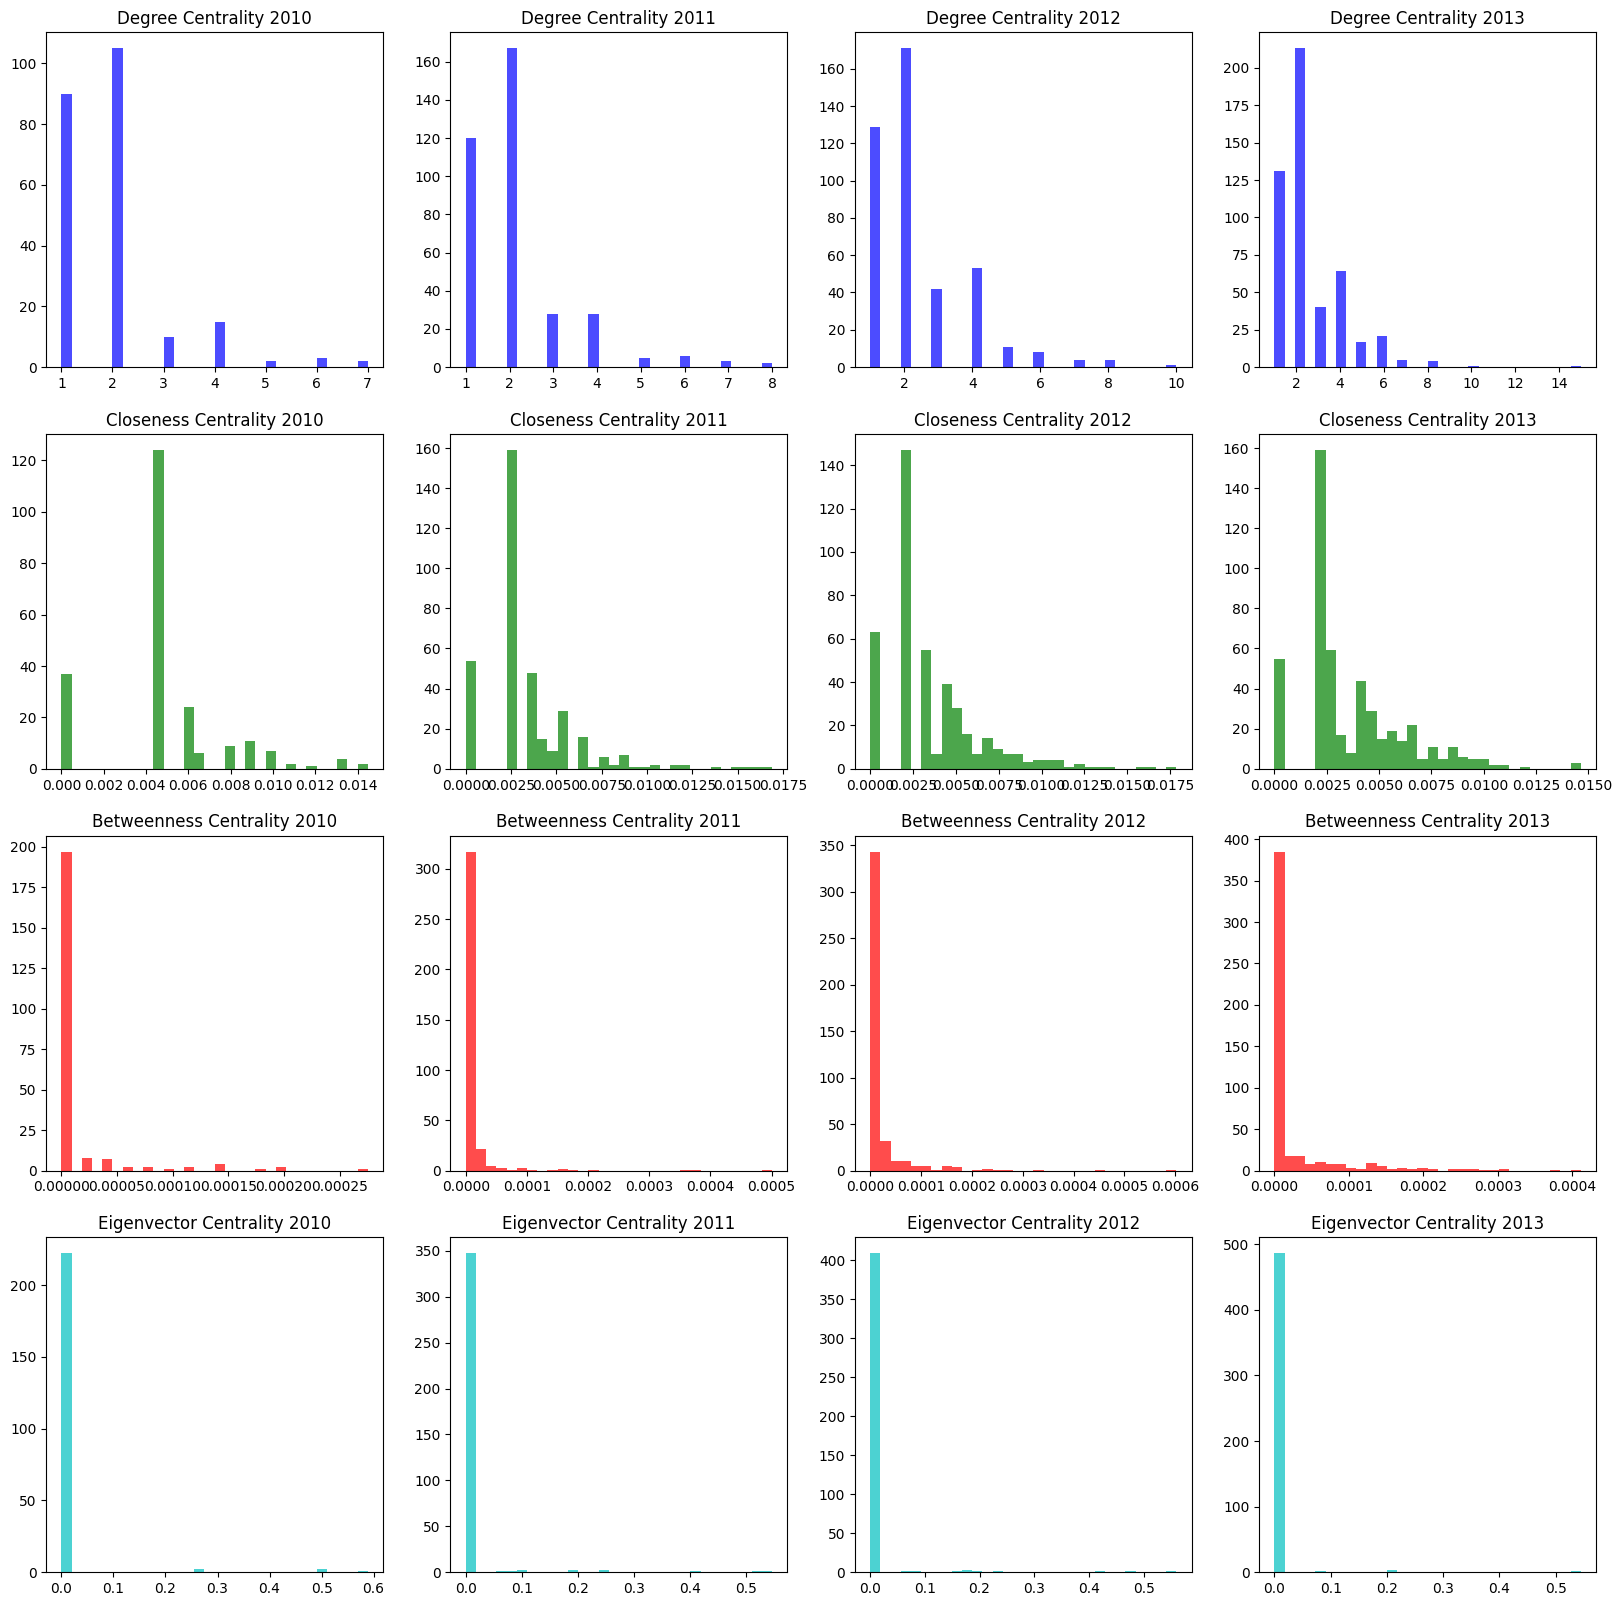

In [17]:
# Example usage
folder_path = '../Pickle Graphs/'
summary_statistics(folder_path)